# Lab N
### Morphology

Skimage morphology operators' documentation:
https://scikit-image.org/docs/dev/api/skimage.morphology.html

In [5]:
from commonfunctions import *
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage.morphology import binary_erosion, binary_dilation, binary_closing,skeletonize, thin
from skimage.measure import find_contours
from skimage.draw import rectangle
from skimage.draw import polygon_perimeter


# Show the figures / plots inside the notebook
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


(434, 500)


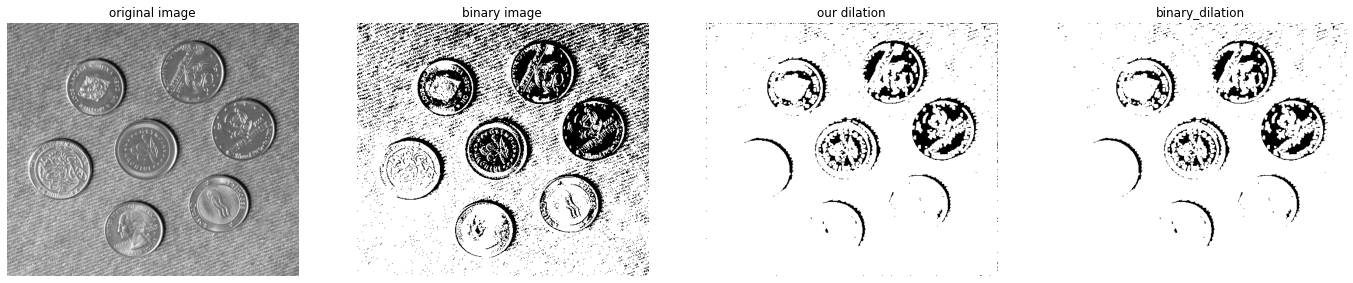

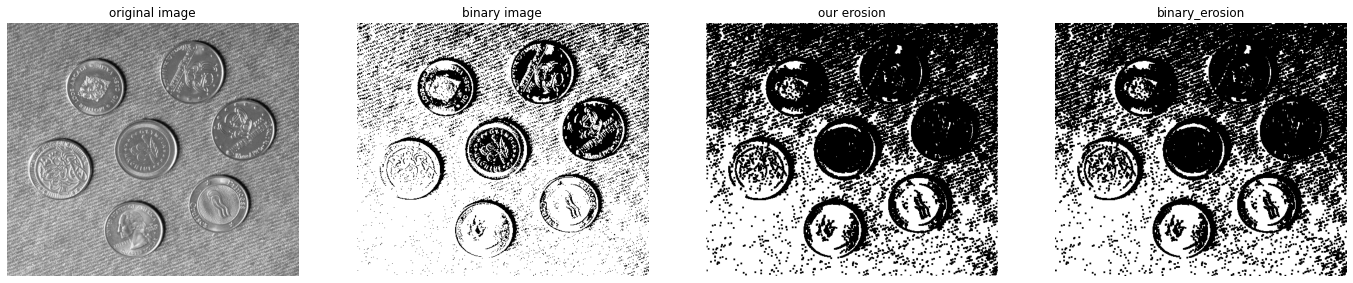

In [2]:
'''
1) Erosion / Dilation:
    - Load "coins.jpg" from the img folder
    - Convert the image to binary
    - Write 2 functions each applying 1 of the erosion/dilation algorithms (with adjustable square window size) manually to the binary image
    - Use Skimage's "binary_erosion" & "binary_dilation" & show the results
'''

def dilation(img, se):
    se_x, se_y = se.shape
    half_width = se_y // 2
    half_height = se_x // 2
    img_x, img_y = img.shape
    res = np.copy(img)
    for i in range(se_x // 2, (img_x - half_height)):
        for j in range(se_y // 2, (img_y - half_width)):
            #print(i, half_height, j , half_width)
            res[i][j] = np.sum((img[i - half_height: i + half_height + 1, j - half_width: j + half_width + 1] * se)) > 0 
    return res

def erosion(img, se):
    se_x, se_y = se.shape
    half_width = se_y // 2
    half_height = se_x // 2
    img_x, img_y = img.shape
    res = np.copy(img)
    for i in range(se_x // 2, (img_x - half_height)):
        for j in range(se_y // 2, (img_y - half_width)):
            #print(i, half_height, j , half_width)
            res[i][j] = np.sum((img[i - half_height: i + half_height + 1, j - half_width: j + half_width + 1] * se)) == np.sum(se) 
    return res

def binary_image(img, threshold):
    new_img = np.copy(img)
    new_img = img > threshold
    print(new_img.shape)
    return new_img


img = 255 * rgb2gray(io.imread('img/coins.jpg'))
binary_img = binary_image(img, 128)

se = np.array([[1, 1, 1],
              [1, 1, 1],
              [1, 1, 1]
              ])
di_img = dilation(binary_img, se)
er_img = erosion(binary_img, se)
show_images([img, binary_img, di_img, binary_dilation(binary_img, se)], ['original image', 'binary image', 'our dilation', 'binary_dilation'])
show_images([img, binary_img, er_img, binary_erosion(binary_img, se)], ['original image', 'binary image', 'our erosion', 'binary_erosion'])

(470, 600)


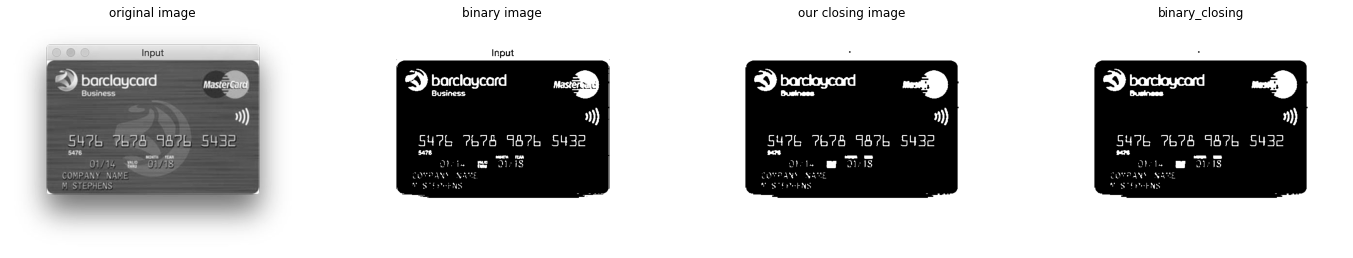

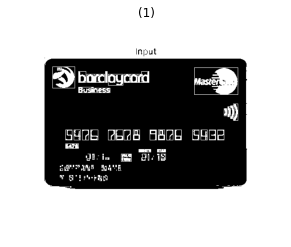

In [6]:
'''
2) Case Study: Credit Card Number Extraction
    - Load "card.jpg" from the img folder
    - Convert the image to binary by brightness thresholding maintaining the card number details for extraction
    - Use your erosion/dilation functions, or Skimage's functions only if you didn't implement them, to apply closing
        Note: The goal of this step is to join the card number into 4 sets of connected pixels
    - Use Skimage's "find_contours" to get the bounding boxes for the credit card's numbers by filtering on aspect ratio (between 2.5 & 3.5)
        Note: When using "find_contours(img, 0.8)" the o/p is a list of contours each having:
                - contour[:,0] being the Y values of the contour perimeter points
                - contour[:,1] being the X values of the contour perimeter points
'''

img = 255 * rgb2gray(io.imread('img/card.jpg'))
binary_img = binary_image(img, 150)

closing_img = erosion(dilation(binary_img, se), se)
show_images([img, binary_img, closing_img, binary_closing(binary_img, se)], [
            'original image', 'binary image', 'our closing image', 'binary_closing'])

result_img = np.copy(binary_img)
contours = find_contours(binary_img)
boxes = []
for contour in contours:
    Xmin = np.min(contour[:, 0])
    Xmax = np.max(contour[:, 0])
    Ymin = np.min(contour[:, 1])
    Ymax = np.max(contour[:, 1])
    boxes.append([Xmin, Xmax, Ymin, Ymax])

for box in boxes:
    r = [box[0],box[1],box[1],box[0], box[0]]
    c = [box[3],box[3],box[2],box[2], box[3]]
    rr, cc = polygon_perimeter(r, c, result_img.shape)
    result_img[rr, cc] = 1 #set color white

show_images([result_img])

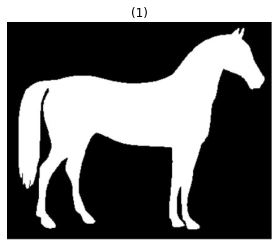

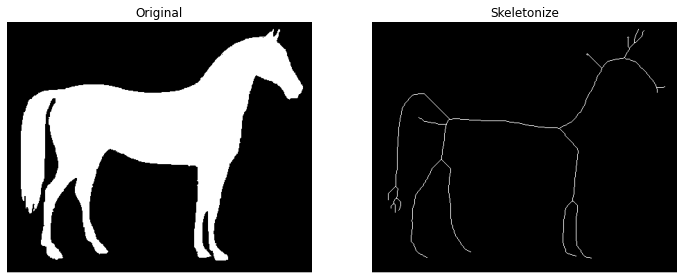

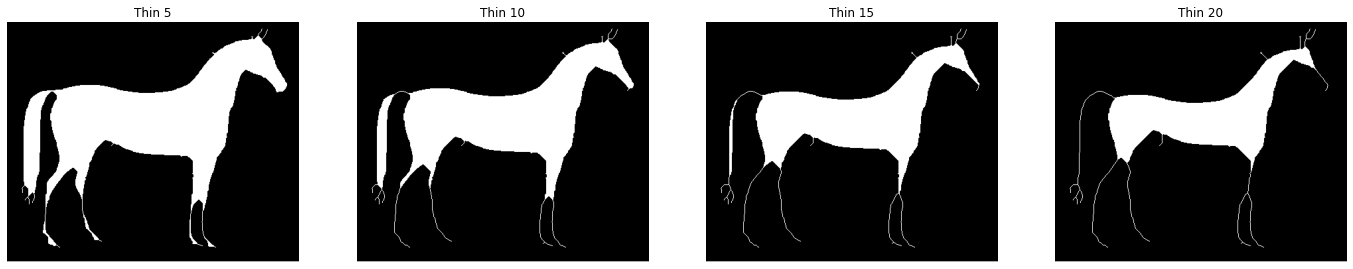

In [4]:
'''
3) Skeletonization:
    - Load "horse.jpg" from the img folder 
    - Use a binary threshold of 0.9 to remove invisible noise in the background
    - Use Skimage's "skeletonize(image)" to acquire the image's skeleton & show it
    - Use Skimage's "thin(image, max_iter)" with values of max_iter 5/10/15/20 & show it
'''
img = rgb2gray(io.imread('./img/horse.jpg'))

show_images([img])

img = 1.0 * (img > img.max() * 0.9)

imgSkel = skeletonize(img)

imgThin5 = thin(img, 5)

imgThin10 = thin(img, 10)

imgThin15 = thin(img, 15)

imgThin20 = thin(img, 20)

show_images([img, imgSkel], ["Original", "Skeletonize"])

show_images([imgThin5, imgThin10, imgThin15, imgThin20], ["Thin 5", "Thin 10", "Thin 15", "Thin 20"])
